In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Изучаем библиотеку pm

In [2]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


* В ней есть различные варианты случайных распределений

Попытаемся немного посмотреть, что в ней есть

> `pm.Model()` - это пространство, в котором инкапсулируются все созданные в нем распределения, задается как контекстный мендежер, без указания не даст создать никакое распределение  

> `pm.draw(p, draws=N)` - это генератор случайных чисел

Основные распределения:
* pm.Uniform
* pm.DiscreteUniform
* pm.Poison
* pm.Exponential
* pm.Normal
* pm.Binomial
* pm.Bernoulli

In [3]:
def plot_histogram(dist_func, *args, draws=1000):
    with pm.Model():
        dist = dist_func("dist", *args)
    
    sns.histplot(pm.draw(dist, draws=draws));

In [7]:
with pm.Model():
    dist = pm.Uniform("dist", 1, 20)
    print(pm.draw(dist, draws=100));

[13.17278718  5.60394113 12.53420988 19.85817895 11.21644402 19.43596503
 10.25193007 12.05390355  2.48951557  8.46397272  4.41730584  9.53735384
 17.35815626  9.47087891 14.2377223   9.4347031  16.37384104 11.96026151
 16.46282751  1.10731997  1.19147328  3.0936614  12.67993234 18.66591711
  3.66121641 18.49913535  5.06682938 18.06123465 15.23374926  6.05009823
 10.69429516 19.11063237  2.84649681  2.73475253  5.0585327   4.62512624
  9.21884879 19.82743592 11.32228361 18.61999204 12.35207995 11.47713469
 12.38234147 18.42893144 10.67112708  4.96877132  8.71595809  3.97711628
 17.4371488  13.7239109  17.5151207  13.05247843  7.00159375 15.48185189
  7.54989182  1.08558939  9.45954673 17.16541184  6.42724908  1.92280772
  7.27549599 19.58059428  9.21227931 16.04164015  9.34056498 17.82845223
 18.19240717 18.53889165  7.7892164  13.71892057 10.85624101 14.47490589
 16.03995884  7.63388569 10.44395656 18.86207431  3.53735562  2.3350398
 17.73736114 11.37298596  9.22964786 17.96377078  9.

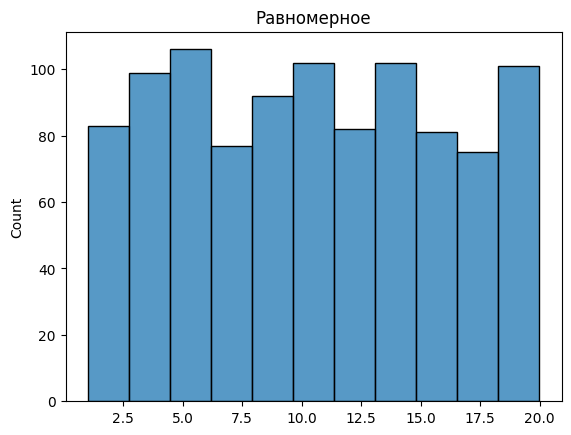

In [8]:
plot_histogram(pm.Uniform, 1, 20)
plt.title("Равномерное");

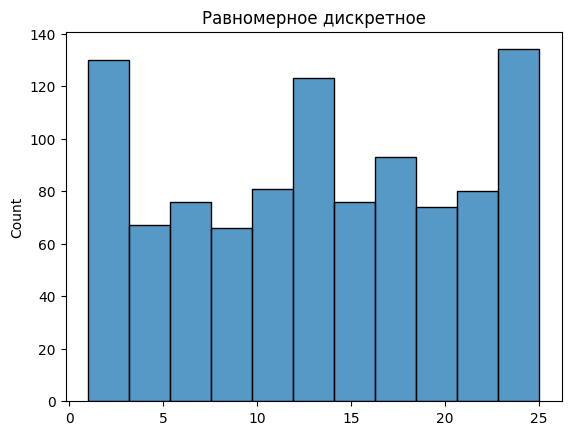

In [9]:
plot_histogram(pm.DiscreteUniform, 1, 25)
plt.title("Равномерное дискретное");

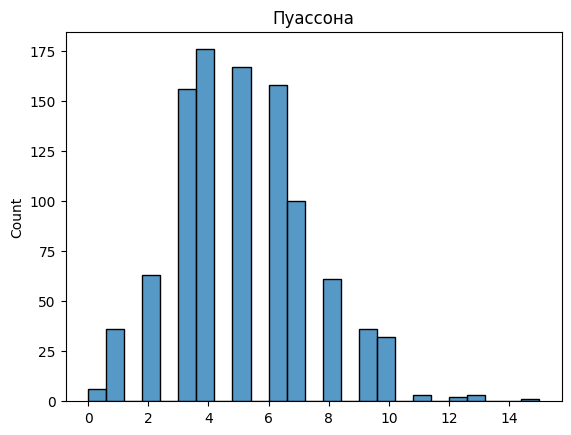

In [10]:
plot_histogram(pm.Poisson, 5)
plt.title("Пуассона");

In [28]:
with pm.Model():
    dist = pm.Uniform("dist", 1, 20)
    print(pm.draw(dist, draws=100));

[ 4.61339242 17.17852966 16.05820924 18.71605875 16.89406048 11.75385709
  8.42164333 11.55907495  2.48513485 12.59631181 17.22682278  7.24629826
 16.13866681  5.68903336  6.98108653  1.83396421  3.26438751  6.985757
  2.76505626  3.0986131   4.5487441   7.82416014 13.95266119 13.2125852
 16.34596205 16.19087312 14.75437571  3.20792239  7.1580353   7.31168959
 16.49291397 16.67892528 14.37993399 11.90306297  8.27508833  1.76465761
  9.60482095  4.54433131  6.1979445   5.30054807  4.07527963 19.73419352
  7.03397112 16.14208755 18.69613344  5.72080583 19.44708591  9.58556879
  4.27647267 12.79561359 18.18175421  5.85661303 10.4614347  16.3775578
 17.75357941  5.32629614 16.02449036  4.94765305  1.0638215   7.36856764
  2.57311098  9.40831289 14.22959369 13.06922869 10.04916334 10.96257894
 10.76005824  3.94102813 18.94060755 13.37835441 19.87167634 17.16151948
 17.8984712  12.20444956 15.98415891  3.1873285  15.64282599  9.78306042
  5.49756783 16.40752349  3.54104136 19.71827678 18.066

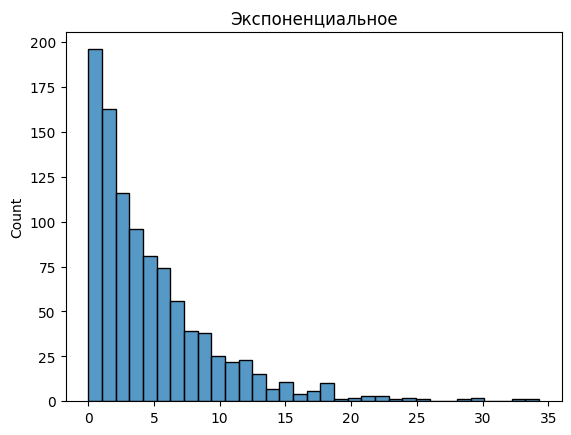

In [11]:
plot_histogram(pm.Exponential, 1/5)
plt.title("Экспоненциальное");

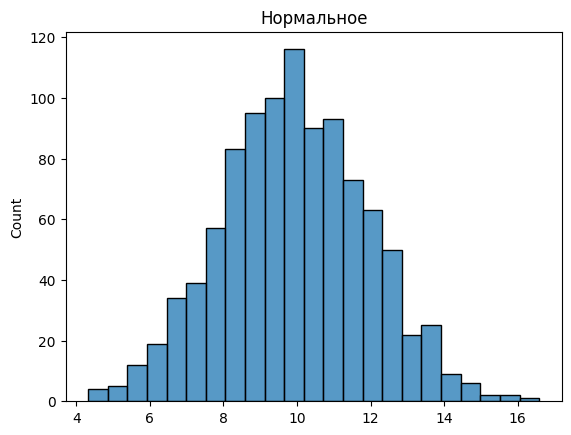

In [12]:
plot_histogram(pm.Normal, 10,2)
plt.title("Нормальное");

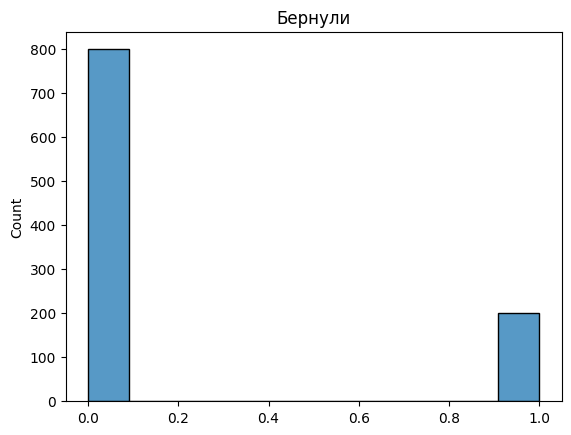

In [13]:
plot_histogram(pm.Bernoulli, 0.22)
plt.title("Бернули");

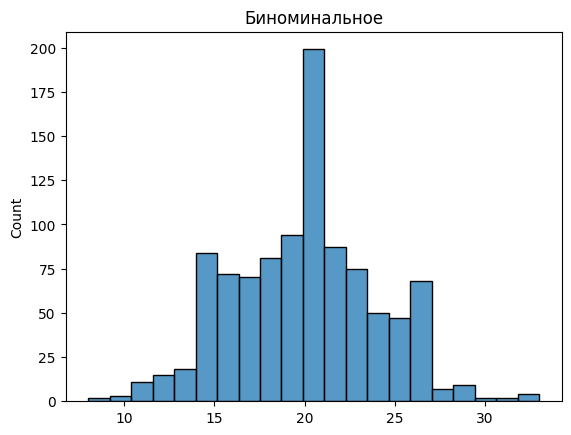

In [15]:
plot_histogram(pm.Binomial, 100, 0.2)
plt.title("Биноминальное");

## Более сложная модель, когда параметр одной переменной сам является случайным распределением

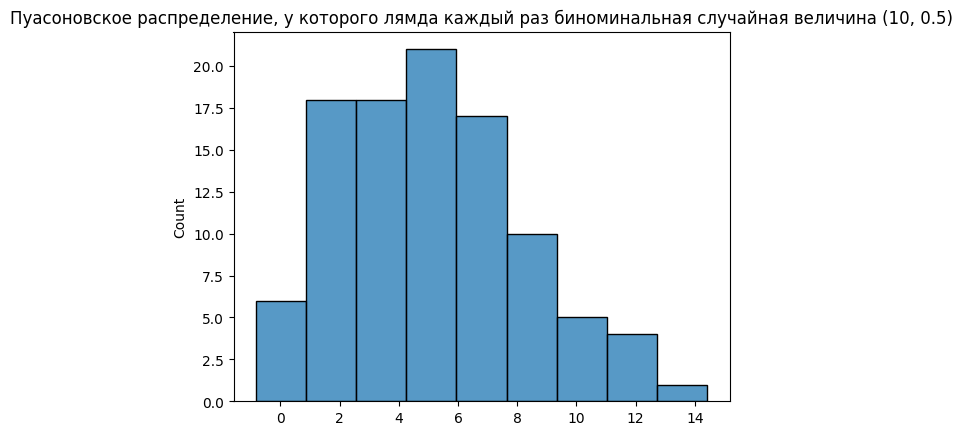

In [17]:
with pm.Model():
    lambda_ = pm.Binomial("lambda", 10, 0.5)
    target = pm.Poisson("target", lambda_)
    target2 = pm.Normal("second", target)
    
    sns.histplot(pm.draw(target2, draws=100));
plt.title("Пуасоновское распределение, у которого лямда каждый раз биноминальная случайная величина (10, 0.5)");

## Можем делать детерминированые функции (модификаторы, которые не добавляют случайности, а добавляют какие-то фиксированые транформации к случайным величинам)

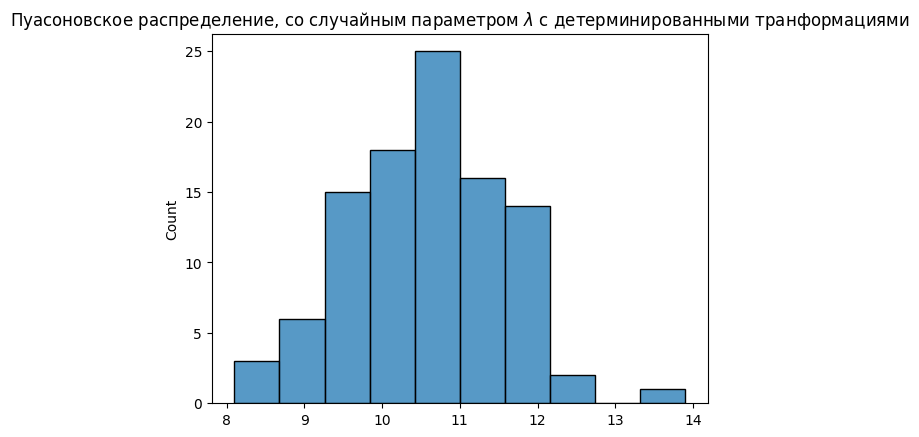

In [18]:
with pm.Model():
    lambda_ = pm.Binomial("lambda", 10, 0.5)
    lambda_plus = lambda_ + 100
    target = pm.Poisson("target", lambda_plus)
    target_plus = target / 10

    sns.histplot(pm.draw(target_plus, draws=100));
plt.title("Пуасоновское распределение, со случайным параметром $\lambda$ с детерминированными транформациями");

Через `pm.Determenisic` можем задать детерменированной переменной имя, чтобы оно учитывалось в наших следах (trace)

In [20]:
def some_function_of_variables(x):
    return(x * 100)

with pm.Model():
    a = pm.Bernoulli("p", 0.5)
    deterministic_variable = pm.Deterministic("deterministic variable", some_function_of_variables(a))
    print(pm.draw(deterministic_variable, draws=100))

[  0 100   0 100 100 100 100   0 100 100 100 100 100 100   0   0 100   0
 100   0 100 100 100 100   0   0 100   0   0   0 100   0   0 100 100   0
 100 100   0   0   0 100 100   0   0 100   0 100   0   0 100 100   0 100
 100   0 100   0   0 100 100 100   0   0 100 100 100 100   0   0   0 100
 100   0 100   0   0 100   0 100 100   0 100   0 100 100   0 100   0   0
   0   0   0 100 100 100 100   0   0 100]


# Можем геренировать сразу несколько значений

In [24]:
with pm.Model():
    a = pm.Bernoulli("a", 0.2, shape=10)
    print(pm.draw(a, draws=10))
    

[[1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1]
 [0 0 1 1 1 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1]]


# Или немного сложнее
первая модель генерирует 10 значений параметра, а вторая генерирует свой набор на их основании

In [25]:
with pm.Model():
    a = pm.Binomial("a", 100, 0.2, shape=10)
    b = pm.Poisson("b", a)
    print(pm.draw((a, b)))
    

[array([20, 28, 22, 20, 19, 19, 19, 23, 22, 18]), array([22, 25, 22, 14, 21, 21, 12, 21, 16, 12])]


In [29]:
with pm.Model():
    a = pm.Binomial("a", 100, 0.2, shape=10)
    b = pm.Poisson("b", a)
    print(pm.draw((a, b), draws=2))
    

[array([[24, 24, 18, 26, 12, 20, 24, 25, 22, 16],
       [19, 25, 25, 16, 20, 23, 20, 18, 18, 22]]), array([[34, 16, 19, 29,  8, 24, 19, 20, 20, 12],
       [22, 28, 34, 17, 21, 28, 21, 20, 19, 13]])]


## Ну и пример из книжки

Генерирует $\lambda_1$ и $\lambda_2$, и для первых tau точек использует распределение Пуассона с $\lambda_1$, а для остальных $\lambda_2$.  
Причем tau - это тоже случайная величина из равномерного дискретного распределения.

In [36]:
alpha = 0.05
N = 100

with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=N - 1)
    
    idx = np.arange(N)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    target = pm.Poisson("obs", lambda_)
    

In [40]:
pm.draw(target)

array([24, 24, 16, 17, 18, 17, 15, 28, 32, 25, 27, 17, 32, 18, 18, 22, 33,
       23, 24, 27, 21, 20, 31, 26, 16, 22, 21, 22, 27, 21, 30, 24, 18, 31,
       28, 23, 24, 25, 17, 17, 20, 31, 20, 19, 32, 22, 24, 21, 25, 25, 31,
       23, 30, 12, 24, 24, 21, 30, 26, 24, 21, 18, 16, 18, 23, 20, 23, 16,
       23, 20, 24, 18, 28, 41, 44, 48, 46, 51, 41, 48, 44, 52, 33, 43, 47,
       47, 51, 52, 62, 51, 44, 47, 47, 52, 36, 42, 38, 51, 51, 43])

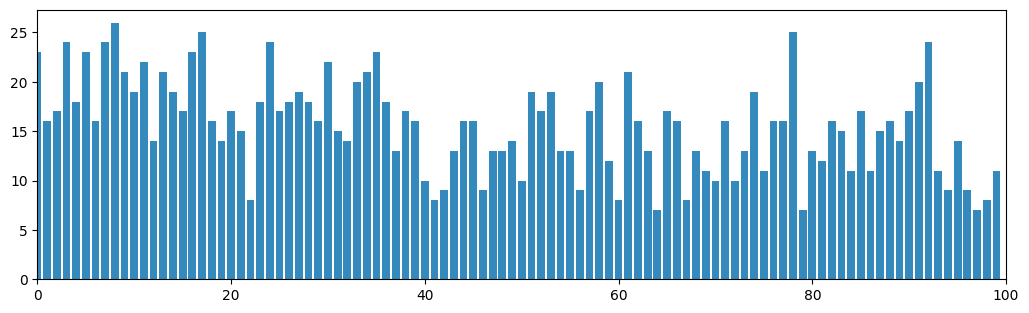

In [41]:
figsize(12.5, 3.5)
plt.bar(np.arange(N), pm.draw(target), color="#348ABD")
plt.xlim(0, N);

# А можно связать нашу модель случайных чисел с наблюдаемыми данными

Для этого мы можем пределать наблюдаемые значения.  
После этого запустить метод **sample** который на осовании нашей модели и наблюдаемых данных сделает выборку из *постериорного распределения*

In [46]:
real_draws = [0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1] * 10
with pm.Model():
    monetka_prob = pm.Uniform("monetka_prob", 0,1)
    observed = pm.Bernoulli("observed", monetka_prob, observed=real_draws)
    
    trace = pm.sample(return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [monetka_prob]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


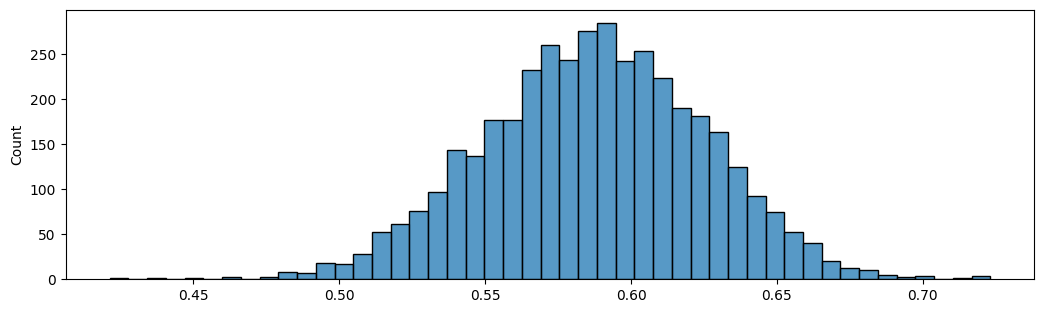

In [47]:
sns.histplot(trace['monetka_prob']);

<Axes: >

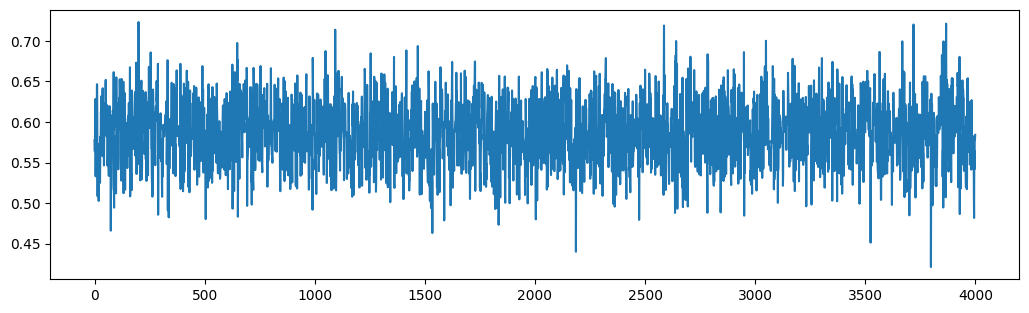

In [48]:
sns.lineplot(trace['monetka_prob'])

# Пример из книги

> Автор получал СМС сообщения, и у него есть предположения что с какого-то дня он стал получать значительно больше сообщений, чем до этого.

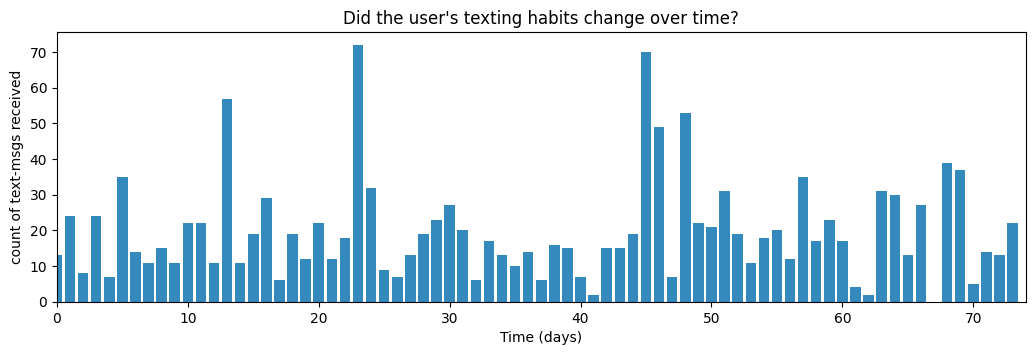

In [51]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

In [53]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)


In [54]:
with model:
    trace = pm.sample(return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [lambda_1, lambda_2]
>Metropolis: [tau]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


In [55]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [56]:
lambda_1_samples.shape

(4000,)

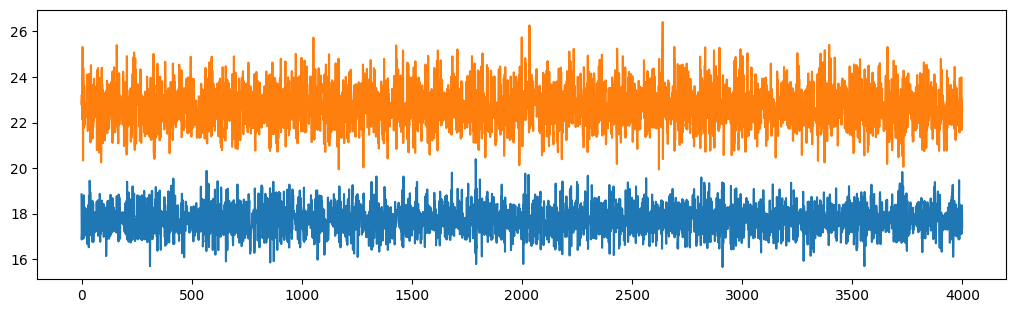

In [57]:
sns.lineplot(lambda_1_samples);
sns.lineplot(lambda_2_samples);

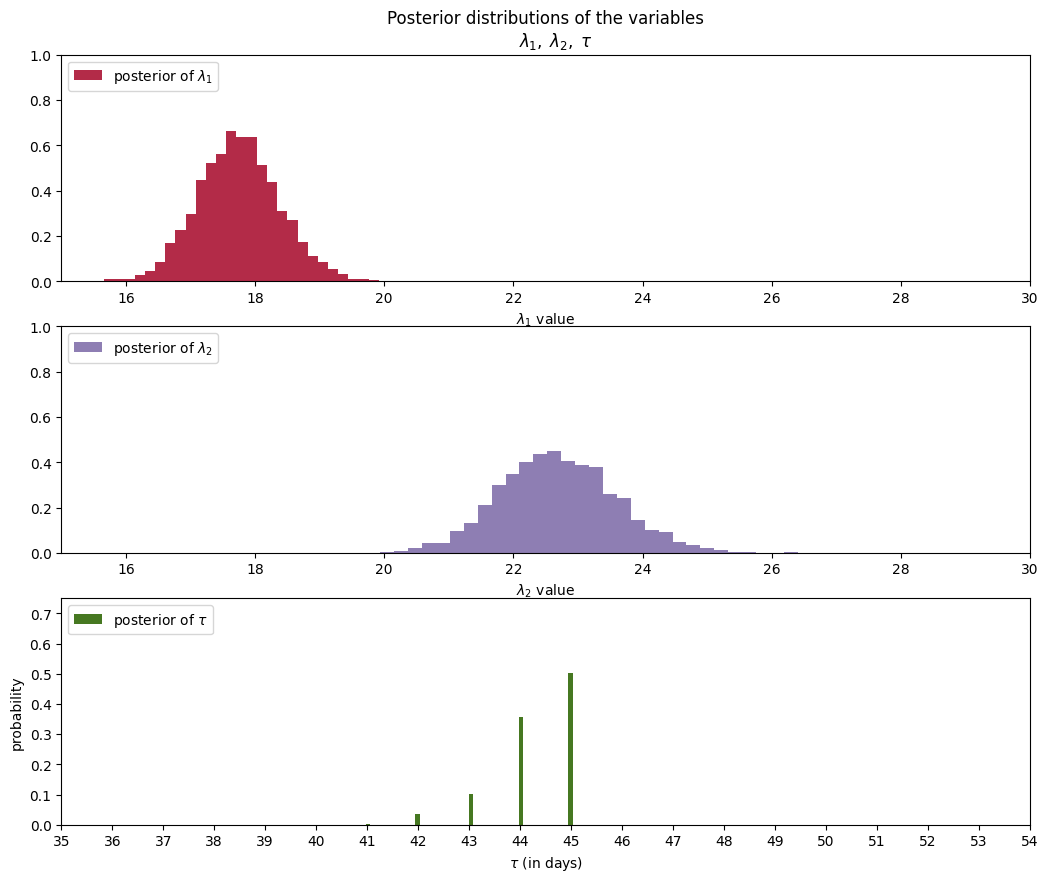

In [58]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

# Еще один пример

### Определение кто из студентов списывал

> В процессе опросас студентов каждый студент подбрасывает (скрытно от опрашивающего) монету. Если выпал орел, то студент отвечает честно списывал ли он. В противном случае (если выпадает решка) студент (скрытно) подбрасывает монету снова и отвечает "Да я списывал" - если выпадает орел, и "Нет, я не мошеничал" если выпдает решка. При этом опрашивающий не знает, был ли ответ "Да" результатом чистосердечного признания, или орлом, выпавшим при повторном подбрасывании монеты. Таким образом, конфиденциальность сохраняется, а исследователи получают правдивые ответы

In [59]:
with pm.Model() as model4:
    N = 100
    p = pm.Uniform('freg_cheating', 0, 1)
    first_coin = pm.Bernoulli('first_flip', 0.5, size=N)
    second_coin = pm.Bernoulli('second_flip', 0.5, size=N)
    observed_proportion = (first_coin * p + (1-first_coin) * second_coin).sum() / N

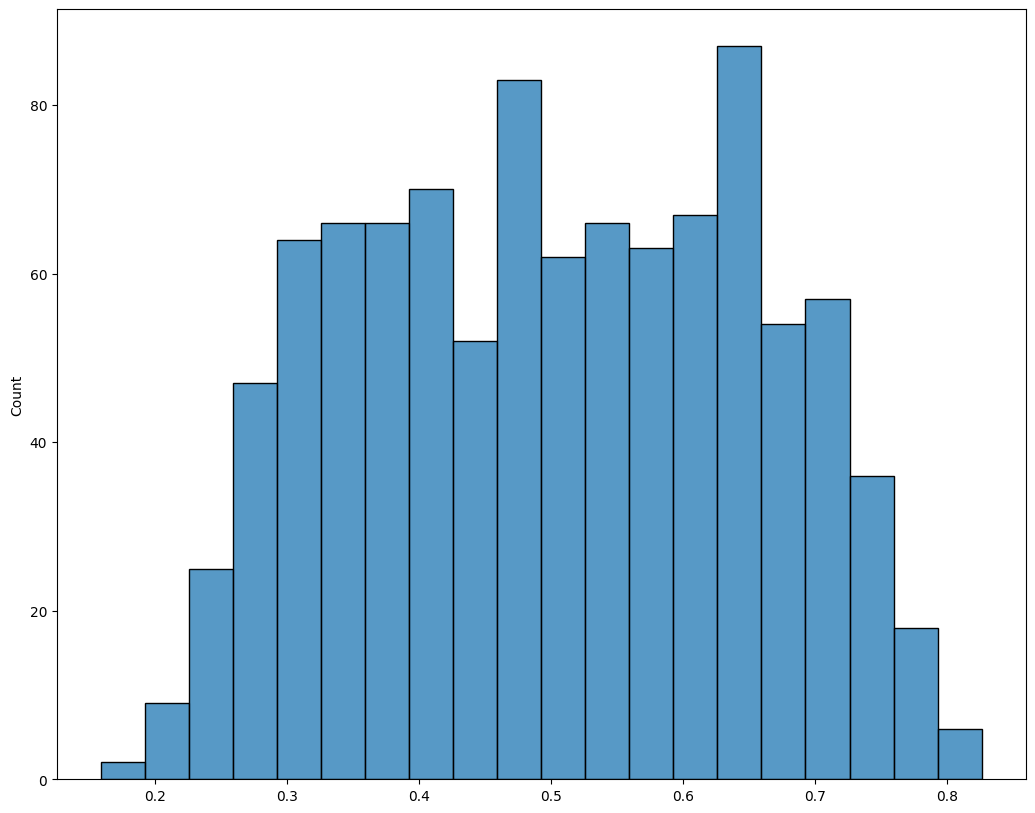

In [60]:
sns.histplot(pm.draw(observed_proportion, draws=1000), bins=20);

In [61]:
with model4:
    real_observations = pm.Binomial('real_obs', N, observed_proportion, observed=35)

In [62]:
with model4:
    trace = pm.sample(return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [freg_cheating]
>BinaryGibbsMetropolis: [first_flip, second_flip]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 81 seconds.
/home/roman/.local/share/virtualenvs/pyMC-book-uXGrxmF5/lib/python3.8/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [63]:
p_real = trace['freg_cheating']

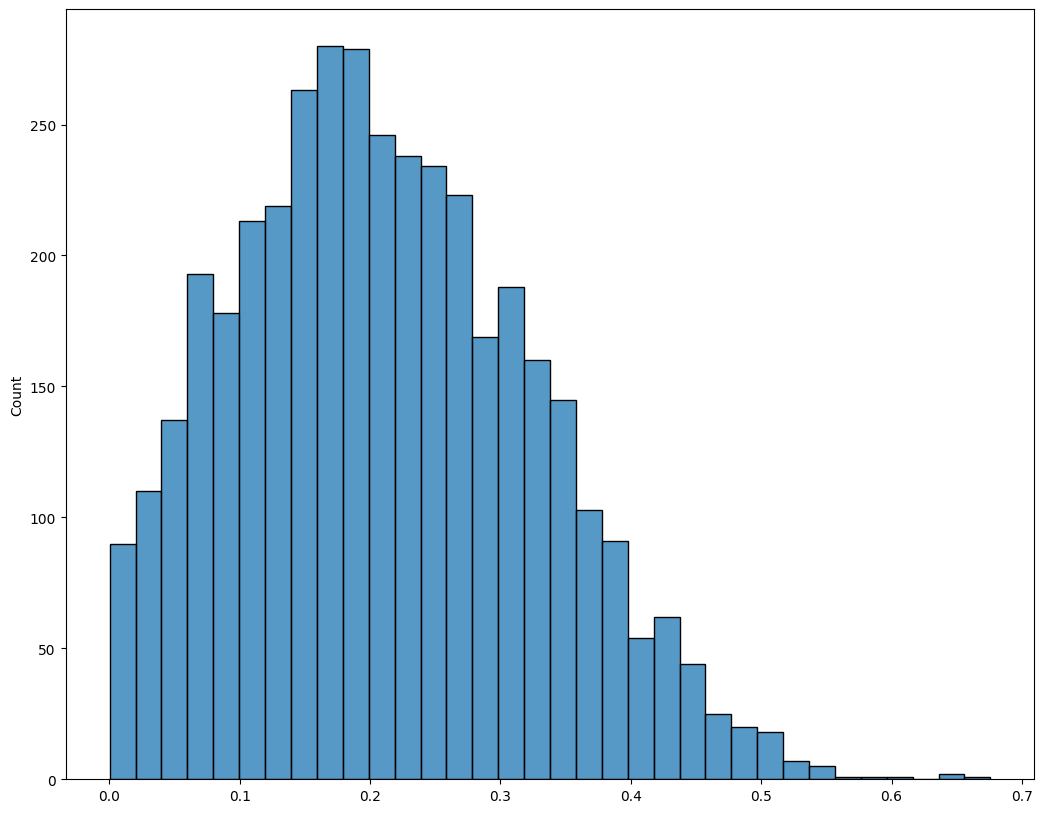

In [64]:
sns.histplot(p_real);

# Еще один пример: А-Б тестирование

Сайт с дизайном **А** и **B** показали **N** людям, и **n** из них совершили покупку.

In [65]:
from scipy.stats import bernoulli

In [67]:
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 700

In [73]:
observations_a = bernoulli.rvs(true_p_A, size=N_A)
observations_b = bernoulli.rvs(true_p_B, size=N_B)

Заметим что **true_p** - для нас не известны, просто у нас искусственный  эксперимент.  
У нас есть только **observations**

In [74]:
print(f"Частота покупок А: {observations_a.mean()}")
print(f"Частота покупок B: {observations_b.mean()}")

Частота покупок А: 0.04933333333333333
Частота покупок B: 0.03428571428571429


Начнем моделирование

In [76]:
with pm.Model():
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    def delta(a,b):
        return(a - b)
    
    # разница
    p_delta = pm.Deterministic("delta", delta(p_A, p_B))
    
    # привязываем данные 
    obs_A = pm.Bernoulli("obs_A", p_A, observed = observations_a)
    obs_B = pm.Bernoulli("obs_B", p_B, observed = observations_b)
    
    trace = pm.sample()
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


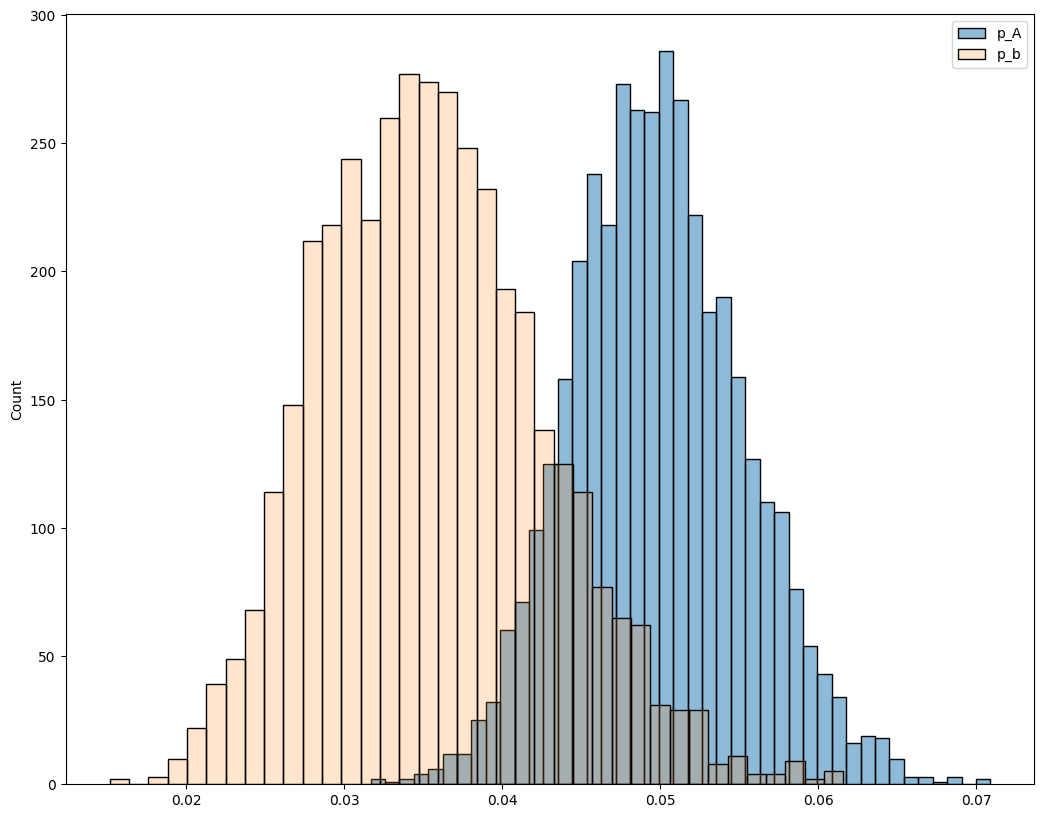

In [77]:
sns.histplot(trace["p_A"], label="p_A", alpha=0.5);
sns.histplot(trace["p_B"], label="p_b", alpha=0.2);
plt.legend();

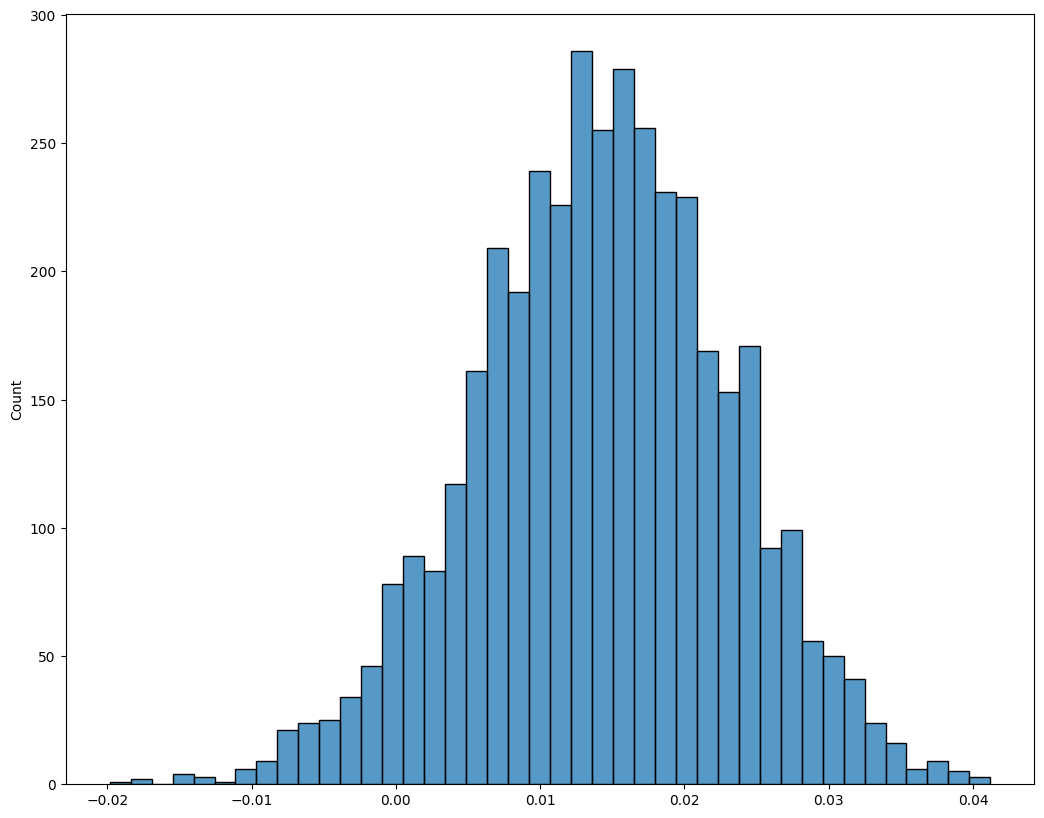

In [78]:
sns.histplot(trace["delta"]);

## объекты из trace можно исползовать для ответа на различные вопросы

In [79]:
p_A = trace["p_A"]
p_B = trace["p_B"]
delta = trace["delta"]

In [80]:
print(f"вероятность что вариант Б лучше варианта А: {(delta < 0).mean()}")
print(f"вероятность что вариант А лучше варианта Б: {(delta > 0).mean()}")

вероятность что вариант Б лучше варианта А: 0.0565
вероятность что вариант А лучше варианта Б: 0.9435


А если мы посчитаем то, что цена показа в варианте Б дешевле чем показ варианта А

In [83]:
revenue_per_click = 10
N = 1_000_000
a_price = 0.1
b_price = 0.05

In [84]:
revenue_A = N * p_A * revenue_per_click - N * a_price

In [85]:
revenue_B = N * p_B * revenue_per_click - N * b_price

In [86]:
revenue_delta = revenue_A - revenue_B

In [87]:
print(f"вероятность что вариант Б лучше варианта А: {(revenue_delta < 0).mean()}")
print(f"вероятность что вариант А лучше варианта Б: {(revenue_delta > 0).mean()}")

вероятность что вариант Б лучше варианта А: 0.1375
вероятность что вариант А лучше варианта Б: 0.8625


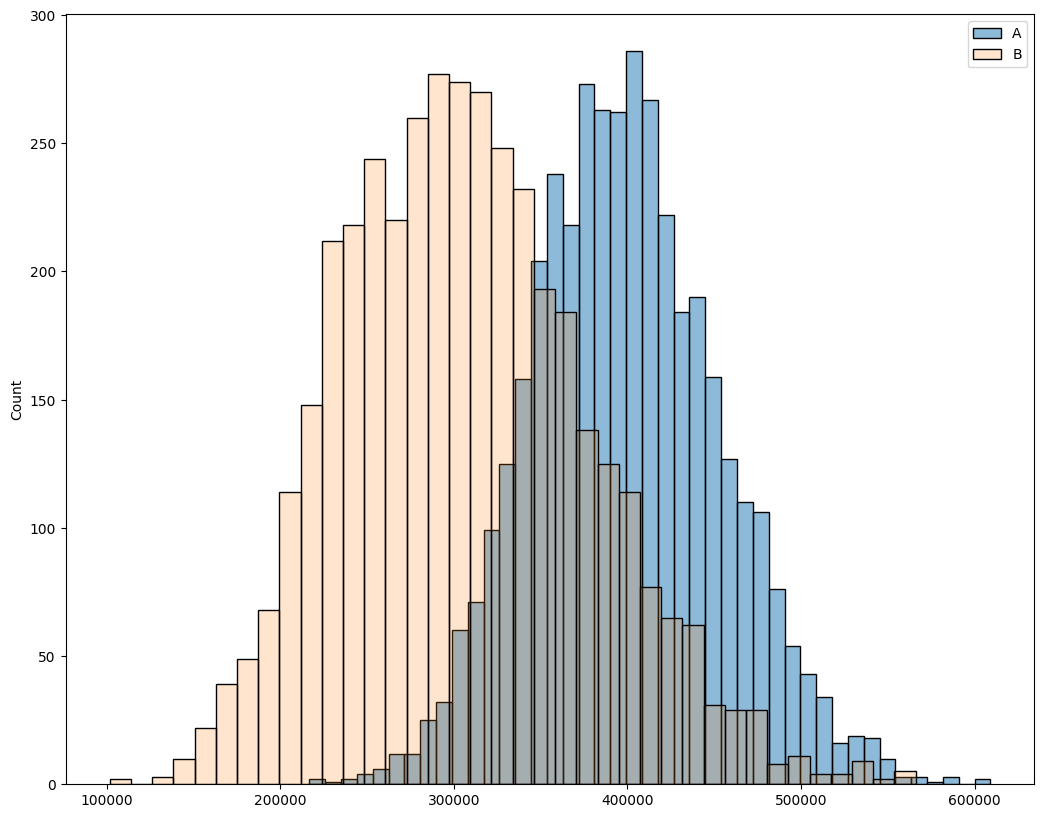

In [88]:
sns.histplot(revenue_A, label="A", alpha=0.5);
sns.histplot(revenue_B, label="B", alpha=0.2);
plt.legend();

# Методы визуализации
* `pm.draw_posterior` - визуализация постериорного распределения
* `pm.plot_forest`
* `pm.plot_trace`
* `pm.summary` - вывод табличного описания из выборок


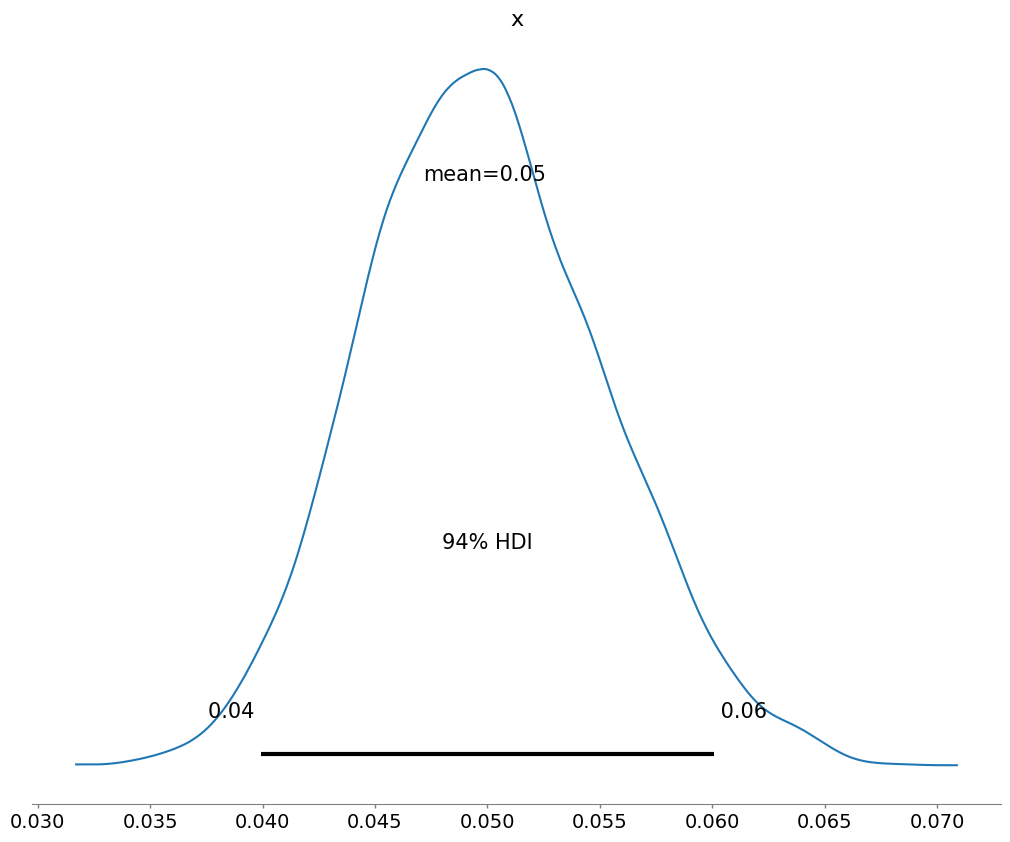

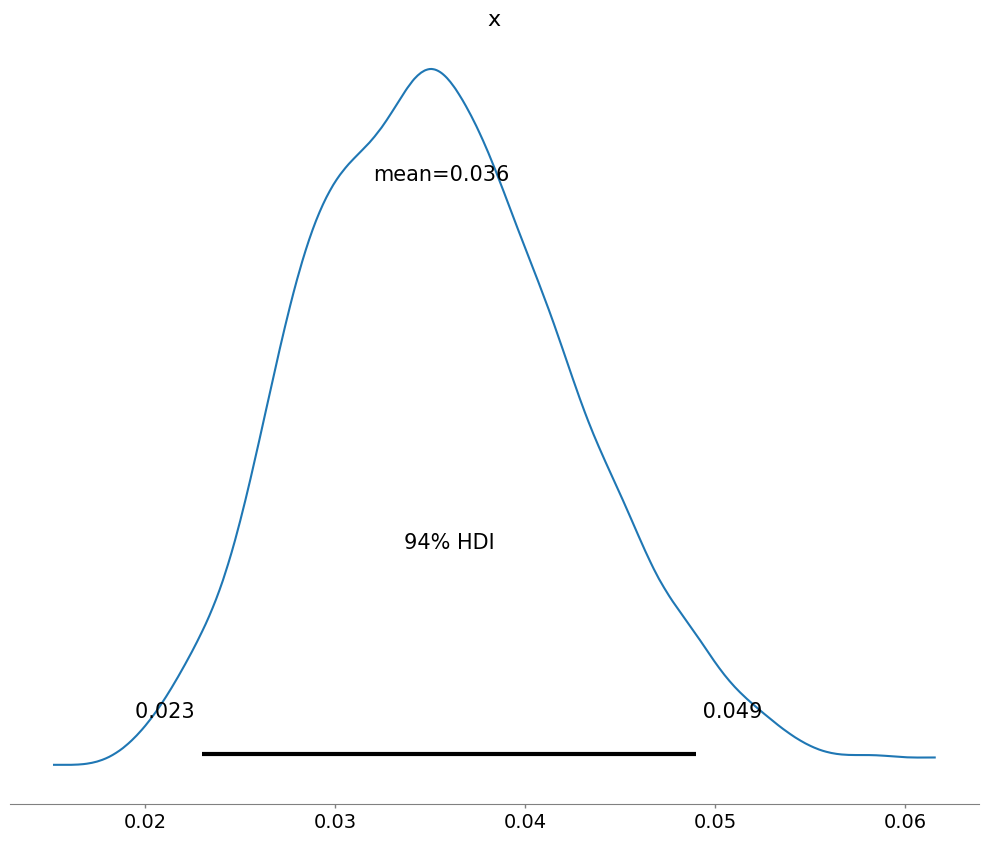

In [91]:
pm.plot_posterior(trace["p_A"]);
pm.plot_posterior(trace["p_B"]);

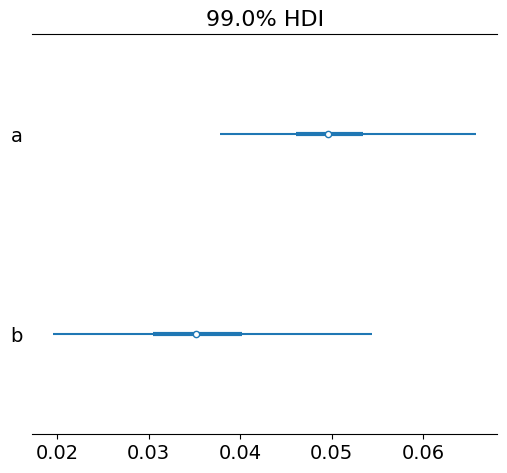

In [92]:
pm.plot_forest(
    {
        "a":trace['p_A'], 
        "b":trace['p_B']
    }, 
    hdi_prob=0.99
);

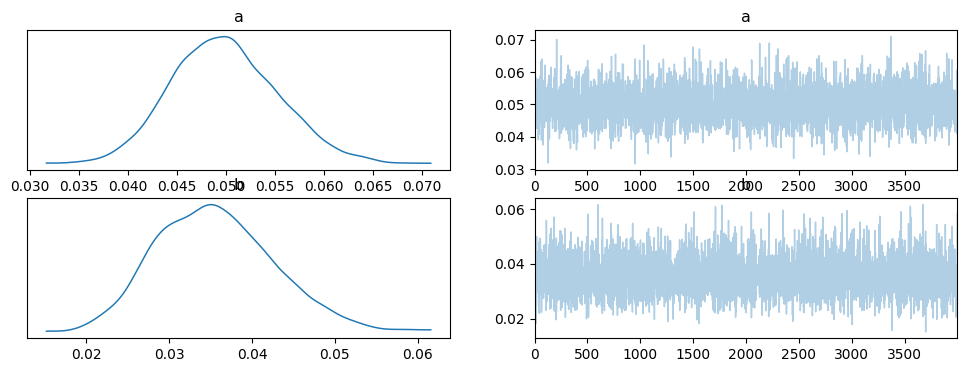

In [93]:
pm.plot_trace({
        "a":trace['p_A'], 
        "b":trace['p_B']
    },
    compact = True
);

In [94]:
pm.summary({
        "a":trace['p_A'], 
        "b":trace['p_B']
    })

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.050,0.005,0.040,0.060,0.0,0.0,4074.0,3093.0,NaN
b,0.036,0.007,0.023,0.049,0.0,0.0,4178.0,2975.0,NaN
